In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your music dataset (replace 'music_dataset.csv' with your actual file)
# If you don't have a dataset yet, you can skip this part for now.
# music_df = pd.read_csv('music_dataset.csv')

# Display the first few rows of your music dataset to get a quick overview
# If you don't have a dataset yet, you can skip this part for now.
# music_df.head()


In [2]:
import zipfile

# Load the FMA dataset (adjust the file path accordingly)
fma_data_path = 'fma_metadata.zip'
csv_file_path = 'fma_metadata/tracks.csv'

# Extract the 'tracks.csv' file from the ZIP archive
with zipfile.ZipFile(fma_data_path) as archive:
    with archive.open(csv_file_path) as file:
        fma_df = pd.read_csv(file, header=[0, 1], skipinitialspace=True, index_col=0, parse_dates=[('track', 'date_created')])


In [26]:
# Display the first few rows of the dataset
print(fma_df.head())
print()
# Check for missing values
print("Missing Values")
print(fma_df.isnull().sum())
print()
# Explore unique values in the target variable (music genre)
fma_df[('track', 'genre_top')].value_counts()


            album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                      

(track, genre_top)
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64

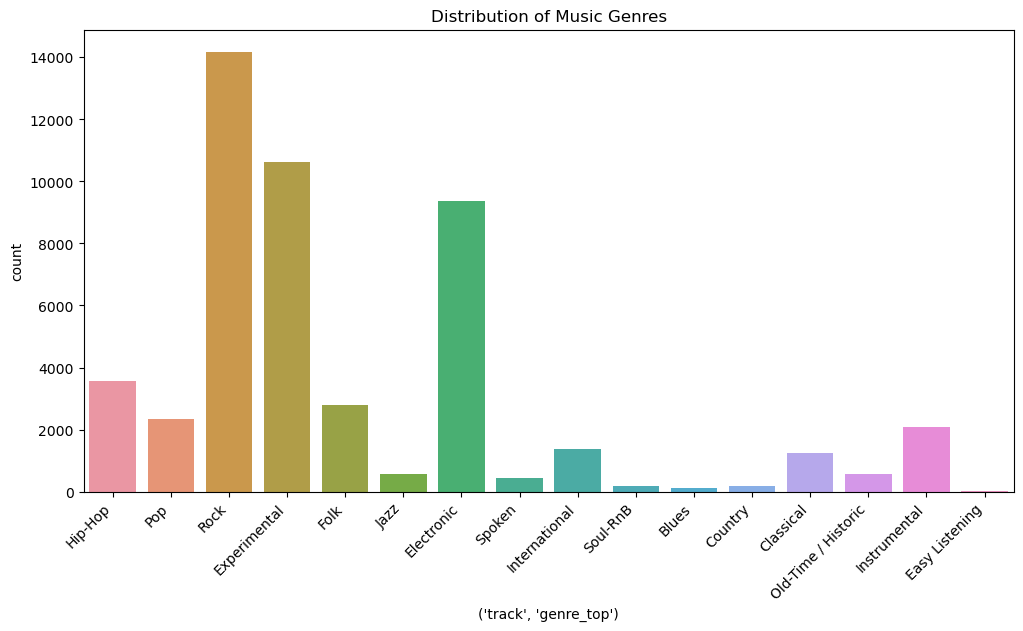

In [50]:
# Visualize the distribution of music genres
plt.figure(figsize=(12, 6))
sns.countplot(x=('track', 'genre_top'), data=fma_df)
plt.title('Distribution of Music Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Exclude non-numerical columns from the pairplot
numerical_columns = fma_df.select_dtypes(include=[np.number]).columns



In [12]:
# Encode categorical variables (if needed)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fma_df[('track', 'genre_encoded')] = label_encoder.fit_transform(fma_df[('track', 'genre_top')])



In [14]:
# Step 8: Split the dataset into features (X) and target variable (y)
X = fma_df.drop([('track', 'genre_top'), ('track', 'genre_encoded')], axis=1)  # Adjust column names
y = fma_df[('track', 'genre_encoded')]


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.ensemble import RandomForestClassifier  # You can choose a different model if needed

# Choose a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [40]:
# Drop non-numeric columns from features
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Choose a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Check for missing values in X_train_numeric
missing_values_train = X_train_numeric.isna().sum()

# Check for missing values in X_test_numeric
missing_values_test = X_test_numeric.isna().sum()

# Print the results
print("Missing values in X_train_numeric:")
print(missing_values_train)

print("\nMissing values in X_test_numeric:")
print(missing_values_test)

#Missing Values are Lat & Long so they can be dropped.

X_train_numeric.fillna(0, inplace=True)
X_test_numeric.fillna(0, inplace=True)



Missing values in X_train_numeric:
album   comments         0
        favorites        0
        id               0
        listens          0
        tracks           0
artist  comments         0
        favorites        0
        id               0
        latitude     49674
        longitude    49674
track   bit_rate         0
        comments         0
        duration         0
        favorites        0
        interest         0
        listens          0
        number           0
dtype: int64

Missing values in X_test_numeric:
album   comments         0
        favorites        0
        id               0
        listens          0
        tracks           0
artist  comments         0
        favorites        0
        id               0
        latitude     12356
        longitude    12356
track   bit_rate         0
        comments         0
        duration         0
        favorites        0
        interest         0
        listens          0
        number           0

In [42]:
# Train the model

model.fit(X_train_numeric, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test_numeric)


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Display additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 91.28%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.98      0.93      0.95       254
           2       0.97      0.70      0.82        44
           3       0.67      0.67      0.67         3
           4       0.98      0.82      0.89      1900
           5       0.94      0.83      0.88      2140
           6       0.98      0.80      0.88       563
           7       0.99      0.86      0.92       746
           8       0.97      0.82      0.89       423
           9       0.99      0.81      0.89       267
          10       0.99      0.67      0.80       109
          11       0.99      0.98      0.99       122
          12       0.98      0.76      0.86       444
          13       0.93      0.86      0.89      2886
          14       1.00      0.76      0.86        45
          15       0.95      0.69      0.80        83
          16       0.88      0.99 